In [1]:
# zkouska  2022-23 - 1 opravka  
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy.signal import spectrogram, lfilter, freqz, tf2zpk, freqs, decimate 

[1, -0.99] [0.99]
   0 [0.01]
   1.5707963267948966 [1.40716026]
   3.141592653589793 [1.99]
[1, -0.98] [0.98]
   0 [0.02]
   1.5707963267948966 [1.40014285]
   3.141592653589793 [1.98]
[1, 0.99] [-0.99]
   0 [1.99]
   1.5707963267948966 [1.40716026]
   3.141592653589793 [0.01]
[1, 0.98] [-0.98]
   0 [1.98]
   1.5707963267948966 [1.40014285]
   3.141592653589793 [0.02]


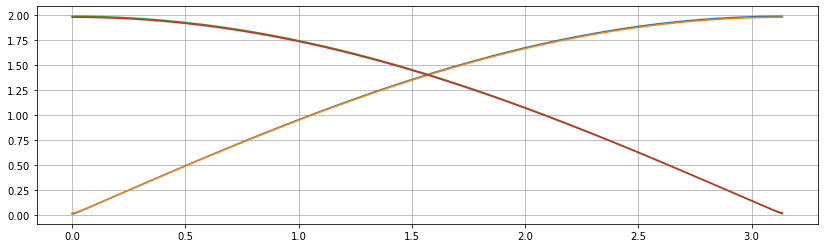

In [2]:
# --- 1 --- 
fig = plt.figure(figsize=(14,4))
for b in ([1, -0.99], [1, -0.98], [1, 0.99], [1, 0.98]):  
    n = np.roots(b)
    print (b, n)
    for om in (0,np.pi/2,np.pi):
        ejo = np.exp(1j * om)
        H = np.abs(ejo - n)
        print("  ",om,H)
    om,H = freqz(b,1,512)
    plt.plot(om,np.abs(H))
plt.gca().grid()

In [3]:
# ---2 --- 
for a in ([1, 0, 0.81], [1, 0, 0.64],[1, 0, 0.49],[1, 0, 1.21]):
    p = np.roots(a)
    print (a, p)

[1, 0, 0.81] [-0.+0.9j  0.-0.9j]
[1, 0, 0.64] [-0.+0.8j  0.-0.8j]
[1, 0, 0.49] [-0.+0.7j  0.-0.7j]
[1, 0, 1.21] [-0.+1.1j  0.-1.1j]


In [4]:
# --- 5 --- 
n = 25 
x = 4 * np.exp(1j * np.pi/2) * np.exp(1j * 2 * np.pi / 50 * n) ; print(x)
x = 4 * np.exp(-1j * np.pi/2) * np.exp(1j * 2 * np.pi / 50 * n) ; print(x)
x = 4 * np.exp(1j * np.pi/2) * np.exp(-1j * 2 * np.pi / 50 * n) ; print(x)
x = 4 * np.exp(-1j * np.pi/2) * np.exp(-1j * 2 * np.pi / 50 * n) ; print(x)

(1.0415687599118386e-15-4j)
(-1.53142747957078e-15+4j)
(-1.53142747957078e-15-4j)
(1.0415687599118386e-15+4j)


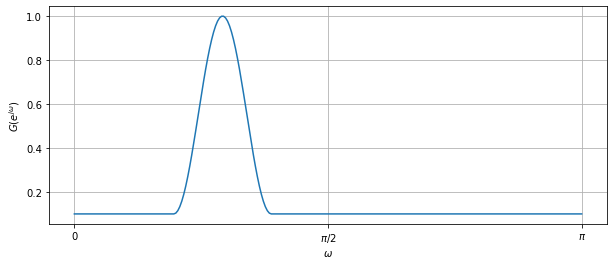

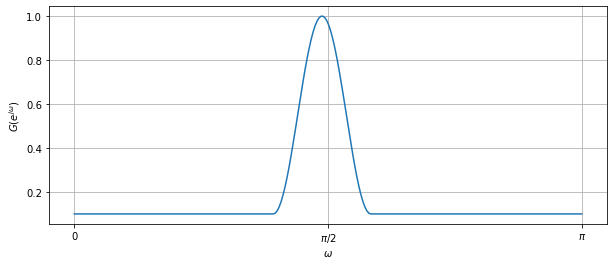

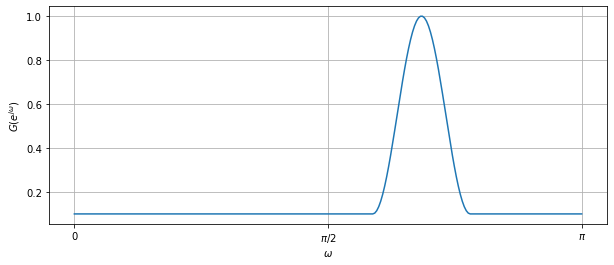

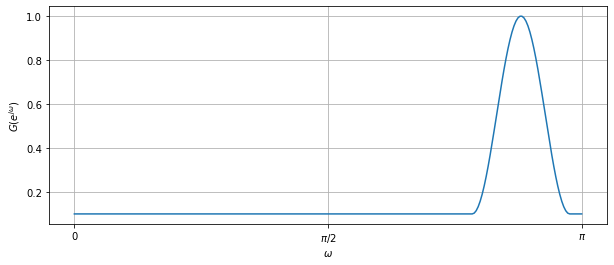

In [5]:
# --- 9 ---- G s bouli ... 
om = np.linspace(0,np.pi,256)
hrbol = np.hanning(50)
for kde in [1,2,3,4]:
    G = 0.1 * np.ones(om.shape)
    G[(kde * 50):(kde * 50+50)] += 0.9 * hrbol
    fig = plt.figure(figsize=(10,4))
    plt.plot(om,G); 
    fig.gca().set_xlabel('$\omega$'); fig.gca().set_ylabel('$G(e^{j\omega})$'); 
    fig.gca().set_xticks([0,np.pi/2,np.pi]); fig.gca().set_xticklabels(['0','$\pi / 2$','$\pi$'])
    fig.gca().grid()
    filename = "9_"+str(kde)+".eps"
    fig.savefig(filename)
    

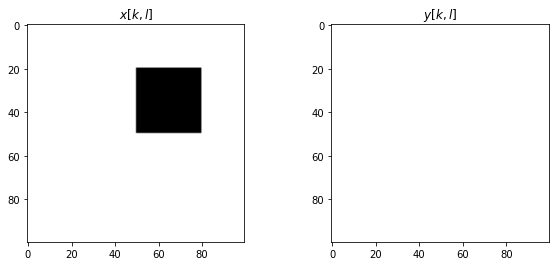

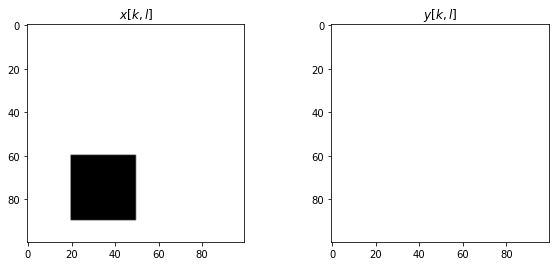

In [6]:
# --- 10 obr --- 
src = np.ones((100,100))
for [x,y] in [[20,50],[60,20]]:
    target = src.copy()
    target[x:(x+30), y:(y+30)] = 0
    fig, ax = plt.subplots(1,2, figsize=(10,4))
    ax[0].imshow(target, 'gray', vmin=0, vmax=1); ax[0].set_title('$x[k,l]$')
    ax[1].imshow(src, 'gray', vmin=0, vmax=1); ax[1].set_title('$y[k,l]$')
    filename = "10_"+str(x)+"_"+str(y)+".eps"
    fig.savefig(filename)


[[5000.    0.    0. 2500.    0.    0.]
 [   0.    0.    0.    0.    0.    0.]
 [   0.    0.    0.    0.    0.    0.]
 [   0.    0.    0.    0.    0.    0.]
 [   0.    0.    0.    0.    0.    0.]
 [   0.    0.    0.    0.    0.    0.]]
[[5000.    0.    0.    0.    0. 2500.]
 [   0.    0.    0.    0.    0.    0.]
 [   0.    0.    0.    0.    0.    0.]
 [   0.    0.    0.    0.    0.    0.]
 [   0.    0.    0.    0.    0.    0.]
 [   0.    0.    0.    0.    0.    0.]]
[[5000.    0.    0.    0.    0.    0.]
 [   0.    0.    0.    0.    0.    0.]
 [   0.    0.    0.    0.    0.    0.]
 [   0.    0.    0.    0.    0.    0.]
 [2500.    0.    0.    0.    0.    0.]
 [   0.    0.    0.    0.    0.    0.]]
[[5000.    0.    0.    0.    0.    0.]
 [   0.    0.    0.    0.    0.    0.]
 [2500.    0.    0.    0.    0.    0.]
 [   0.    0.    0.    0.    0.    0.]
 [   0.    0.    0.    0.    0.    0.]
 [   0.    0.    0.    0.    0.    0.]]


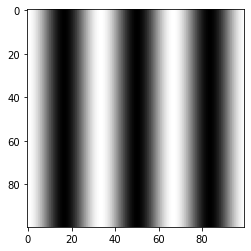

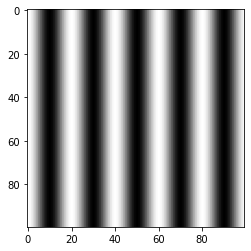

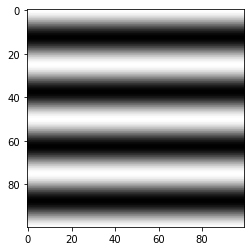

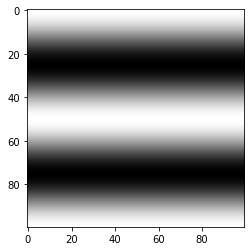

In [7]:
# --- 11 --- 
kall = np.arange(100)
for [m,n] in [[0,3], [0,5], [4,0], [2,0]]:
    a = 0.5 + 0.5 * np.cos(2 * np.pi * (np.outer(m * kall / 100,np.ones(100)) + np.outer(np.ones(100),n * kall / 100)))
    fig=plt.figure(figsize=(4,4)); plt.imshow(a, 'gray', vmin=0, vmax=1); fig.savefig('9_53.eps')
    A = np.abs(np.fft.fft2(a)); print(np.round(A[:6,:6],1))
    filename = "11_"+str(m)+"_"+str(n)+".eps"
    fig.savefig(filename)


In [8]:
# ---12 --- 
print (np.sinc(np.pi / 2 / np.pi))    # my def of sinc ... 
D = 2
k = np.arange(-2,3)
for [theta,T1] in [[0.5e-6,1e-6], [1e-6,2e-6], [2e-6,4e-6], [3e-6,6e-6]]: 
    om1 = 2 * np.pi / T1
    ck = D * theta / T1 * np.sinc(theta/2 * k * om1 / np.pi)
    print(theta, T1, ck)

0.6366197723675814
5e-07 1e-06 [-2.43734253e-16  6.36619772e-01  1.00000000e+00  6.36619772e-01
 -2.43734253e-16]
1e-06 2e-06 [-2.43734253e-16  6.36619772e-01  1.00000000e+00  6.36619772e-01
 -2.43734253e-16]
2e-06 4e-06 [-2.43734253e-16  6.36619772e-01  1.00000000e+00  6.36619772e-01
 -2.43734253e-16]
3e-06 6e-06 [3.89817183e-17 6.36619772e-01 1.00000000e+00 6.36619772e-01
 3.89817183e-17]


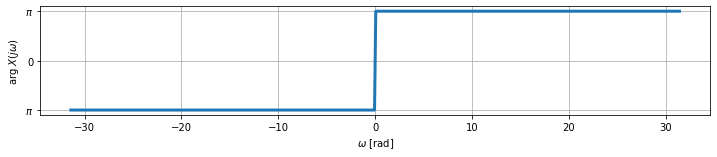

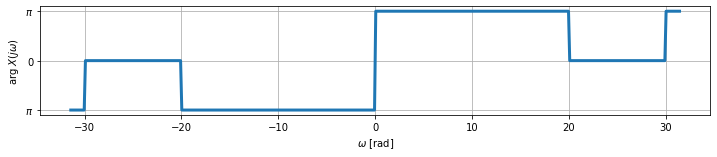

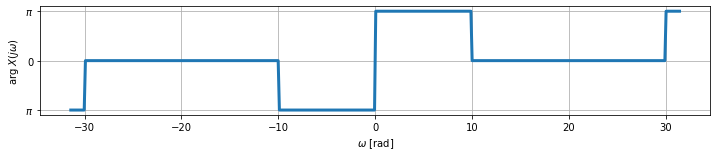

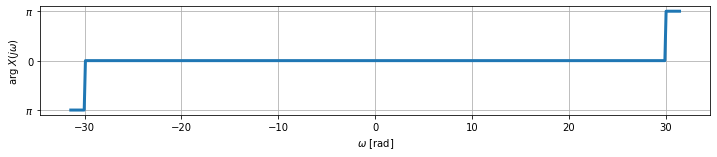

In [9]:
# --- 14 --- 
#%matplotlib inline
om = np.linspace(-10 * np.pi, 10 * np.pi, 500)
argXjo = np.zeros(om.shape); argXjo[om < 0] = -np.pi; argXjo[om > 0] = np.pi
fig=plt.figure(figsize=(12,2)); plt.plot(om, argXjo, linewidth=3); 
fig.gca().set_yticks([-np.pi,0,np.pi]); fig.gca().set_yticklabels(['$\pi$', '0','$\pi$'])
fig.gca().set_xlabel('$\omega$ [rad]'); fig.gca().set_ylabel('arg $X(j\omega)$'); fig.gca().grid()
fig.savefig('14_1.eps')

argXjo_mod = argXjo.copy(); argXjo[(om>-30) & (om<-20)] = 0; argXjo[(om>20) & (om<30)] = 0; 
fig=plt.figure(figsize=(12,2)); plt.plot(om, argXjo, linewidth=3); 
fig.gca().set_yticks([-np.pi,0,np.pi]); fig.gca().set_yticklabels(['$\pi$', '0','$\pi$'])
fig.gca().set_xlabel('$\omega$ [rad]'); fig.gca().set_ylabel('arg $X(j\omega)$'); fig.gca().grid()
fig.savefig('14_2.eps')

argXjo_mod = argXjo.copy(); argXjo[(om>-20) & (om<-10)] = 0; argXjo[(om>10) & (om<20)] = 0; 
fig=plt.figure(figsize=(12,2)); plt.plot(om, argXjo, linewidth=3); 
fig.gca().set_yticks([-np.pi,0,np.pi]); fig.gca().set_yticklabels(['$\pi$', '0','$\pi$'])
fig.gca().set_xlabel('$\omega$ [rad]'); fig.gca().set_ylabel('arg $X(j\omega)$'); fig.gca().grid()
fig.savefig('14_3.eps')

argXjo_mod = argXjo.copy(); argXjo[(om>-10) & (om<-0)] = 0; argXjo[(om>0) & (om<10)] = 0; 
fig=plt.figure(figsize=(12,2)); plt.plot(om, argXjo, linewidth=3); 
fig.gca().set_yticks([-np.pi,0,np.pi]); fig.gca().set_yticklabels(['$\pi$', '0','$\pi$'])
fig.gca().set_xlabel('$\omega$ [rad]'); fig.gca().set_ylabel('arg $X(j\omega)$'); fig.gca().grid()
fig.savefig('14_4.eps')

[1.000000e+00 2.000000e+00 1.000001e+06] [1. 1.] 1.9999992500006092 0.0004999997083334762 2.236403996232273
[1.000000e+00 4.000000e+00 1.000004e+06] [1. 1.] 4.0 0.0 4.12255968159932
[1.000000e+00 6.000000e+00 1.000009e+06] [1. 1.] 6.000003749995078 -0.0004999992083347671 6.081573051294595
[1.000000e+00 8.000000e+00 1.000016e+06] [1. 1.] 8.000011999979 -0.0009999976666730248 8.060499992176775


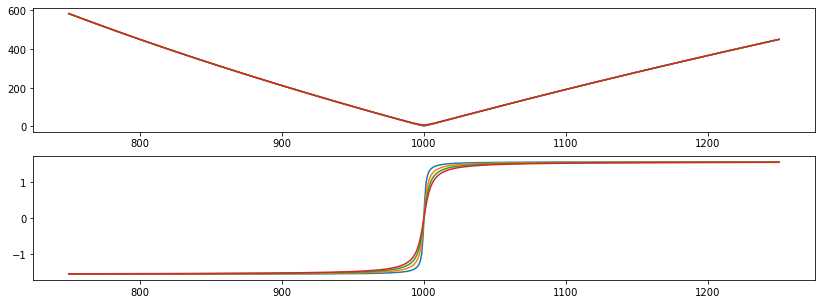

In [11]:
# --- 16 --- 
p1 = -1
a = np.poly([p1])
om = np.linspace(750,1250,500)
jom = 1j*1000
fig, ax = plt.subplots(2,1, figsize=(14,5))
for gg in [-1,-2,-3,-4]: 
    n1 = gg + 1j*1000 ; n2 = gg - 1j*1000 
    b = np.poly([n1,n2])
    _,H = freqs(b,a,om)
    ax[0].plot(om, np.abs(H))
    ax[1].plot(om, np.angle(H))
    
    # rucne ... 
    Habshand = np.abs(jom - n1) * np.abs(jom - n2) / np.abs(jom - p1)
    Harghand = np.angle(jom - n1) + np.angle(jom - n2) - np.angle(jom - p1)
    
    print(b,a,Habshand, Harghand, np.abs(H[250]))